# Trajectory planning

We want the robot to move from a starting point to a final point in cartesian space (point-to-point) with zero initial and final velocity (rest-to-rest).
As timing law we use the natural parametrization: s(t) in range(0, 1) with t in range(0, T).


- Cartesian Path: route the robot's end-effector will follow in Cartesian space from the start point to the end point.

- Timing Law: how the position along the path changes over time. In this case, we want a rest-to-rest motion with zero initial and final velocities.

- Path + Timing Law: we use the timing law to generate position, velocity, and acceleration profiles along the path.

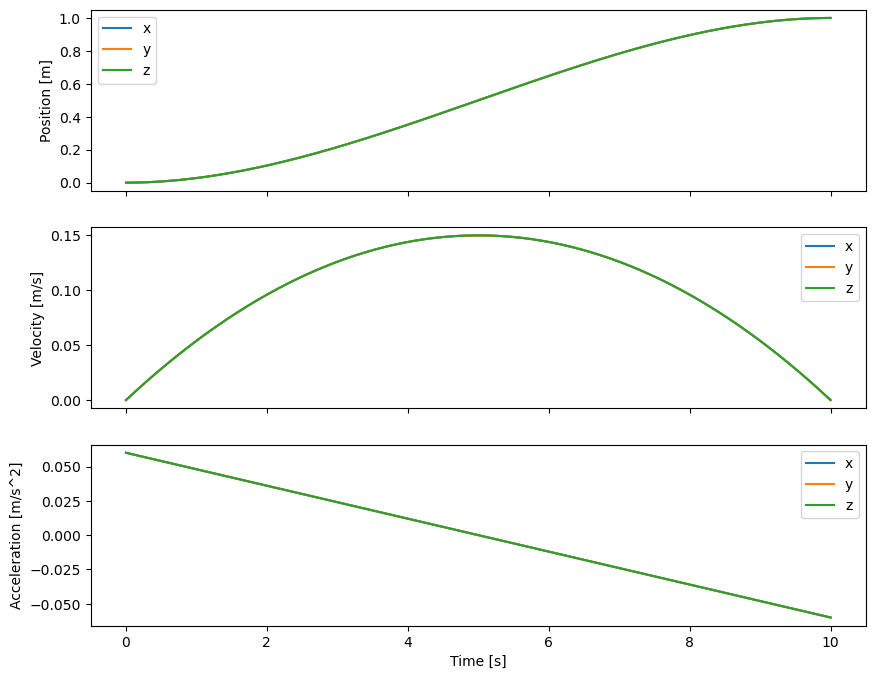

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
P0 = np.array([0, 0, 0])
P1 = np.array([1, 1, 1])
T = 10  # total duration in seconds

# Define the timing law function
def s(t, T):
    return 3 * (t / T)**2 - 2 * (t / T)**3

# First derivative of the timing law
def ds_dt(t, T):
    return 6 * (t / T) * (1 - t / T) / T

# Second derivative of the timing law
def d2s_dt2(t, T):
    return 6 * (1 - 2 * t / T) / T**2

# Time array
time = np.linspace(0, T, 500)

# Calculate position, velocity, and acceleration
positions = np.array([P0 + s(t, T) * (P1 - P0) for t in time])
velocities = np.array([ds_dt(t, T) * (P1 - P0) for t in time])
accelerations = np.array([d2s_dt2(t, T) * (P1 - P0) for t in time])

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axs[0].plot(time, positions)
axs[0].set_ylabel('Position [m]')
axs[0].legend(['x', 'y', 'z'])

axs[1].plot(time, velocities)
axs[1].set_ylabel('Velocity [m/s]')
axs[1].legend(['x', 'y', 'z'])

axs[2].plot(time, accelerations)
axs[2].set_ylabel('Acceleration [m/s^2]')
axs[2].set_xlabel('Time [s]')
axs[2].legend(['x', 'y', 'z'])

plt.show()

# Control a physical robot 

Now that we have positions, velocities and accelerations for any time t in (0, T), we can control a physical robot:

- Inverse Kinematics: convert the Cartesian space trajectory (position, velocity, and acceleration) into joint space (angles, angular velocities, and angular accelerations).

- Trajectory Interpolation: Discretize the trajectory into a series of waypoints that the robot can follow in real-time.

- Motion Control: Use a control algorithm to drive the robot's motors to follow the desired joint space trajectory.

- Feedback and Correction: Utilize sensors to monitor the actual position of the robot and adjust the commands to correct any deviations from the desired trajectory (I will suppose to have an infinitely precise robot so I will skip this step).

In [ ]:
# Discretize the continuous trajectory into a series of time steps that the robot can execute
time_steps = np.linspace(0, T, num=500)
positions = [P0 + s(t, T) * (P1 - P0) for t in time_steps]
velocities = [ds_dt(t, T) * (P1 - P0) for t in time_steps]
accelerations = [d2s_dt2(t, T) * (P1 - P0) for t in time_steps]

